In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [89]:
import numpy as np
from numpy import linspace, sin, cos
from copy import copy
import matplotlib.pyplot as plt
from celluloid import Camera
from IPython.display import HTML

def simulate(Δt, x, u, l1, l2, m1, m2):
    θ1, θ2, θ1_dot, θ2_dot = x
    
    M = np.array([
        [l1**2 * (m1 + m2) + 2 * l1 * l2/2 * m2 * cos(θ2) + l2/2**2 * m2, 
         l2/2 * m2 * (l1 * cos(θ2) + l2/2)],
        [l2/2 * m2 * (l1 * cos(θ2) + l2/2), 
         l2/2**2 * m2]
    ])
    
    θ_ddot = np.linalg.inv(M).dot(u * np.array([0, -1]))
    
    x += Δt * np.concatenate((x[2:], θ_ddot))
    return x

# Parameters
l1, l2 = 2, 1     # Lengths of the pendulum arms
m1, m2 = 1, 1     # Masses
g = 9.8           # Gravity

# Time settings
tf = 6.
Δt = 0.1    # Time step
time = np.linspace(0., tf, int(tf / Δt) + 1)  # Time interval

# Initial conditions
θ1, θ2, θ1_dot, θ2_dot = np.pi/2, - np.pi/2, 0, 0
x = np.array([θ1, θ2, θ1_dot, θ2_dot])
x_log = [copy(x)]

for t in time[1:]:
    # Control input
    u = 0.2

    # Simulate
    x = simulate(Δt, x, u, l1, l2, m1, m2)
    x_log.append(copy(x))

x_log = np.array(x_log)


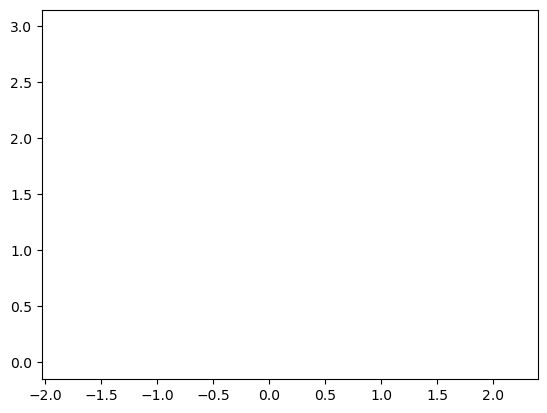

In [91]:
# Visualization using celluloid
fig, ax = plt.subplots()
camera = Camera(fig)

ax.set_xlim(-2 * (l1 + l2/2), 2 * (l1 + l2/2))
ax.set_ylim(-2 * (l1 + l2/2), 2 * (l1 + l2/2))

for frame in x_log:
    θ1, θ2, _, _ = frame
    x1 = l1 * cos(θ1)
    y1 = l1 * sin(θ1)
    x2 = x1 + l2 * cos(θ1 + θ2)
    y2 = y1 - l2 * sin(θ1 + θ2)
    
    xm2 = x1 + l2/2 * cos(θ1 + θ2)
    ym2 = y1 - l2/2 * sin(θ1 + θ2)
    
    ax.plot([0, x1, x2], [0, y1, y2], 'ro-', lw=2)
    
    
    # Draw the arrow at the midpoint of the second pendulum arm
    arrow_x, arrow_y = xm2 , ym2 
    ax.quiver(arrow_x, arrow_y, cos(np.pi/2 - θ1 - θ2), sin(np.pi/2 - θ1 - θ2), angles='xy', scale_units='xy', scale=2, color='blue')
    ax.axis('equal')
    camera.snap()

animation = camera.animate()

display(HTML(animation.to_jshtml()))